<a href="https://colab.research.google.com/github/singwang-cn/Neural-Network/blob/master/CNN_on_MNIST_by_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch 
from torch.utils import data
from torch.autograd import Variable
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [1]:
pip install wandb

     |████████████████████████████████| 1.8 MB 4.6 MB/s 
     |████████████████████████████████| 181 kB 37.0 MB/s 
     |████████████████████████████████| 144 kB 37.2 MB/s 
     |████████████████████████████████| 63 kB 872 kB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=27f9d162aa7d295c64251e9fd0c80d1210cab1a584b2bda4e8aa7d2b181a9f20
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools


In [ ]:
import torch
import torch.nn as nn
from torch.nn import init
import torchvision
import torchvision.transforms as T
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision.datasets as dset
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data_tf = torchvision.transforms.Compose(
    [
        torchvision.transforms.ToTensor()
    ]
)
data_tr = datasets.MNIST("./mnist", train=True, download=True, transform=data_tf)
data_te = datasets.MNIST("./mnist", train=False, download=True, transform=data_tf)

In [ ]:
loader_tr = data.DataLoader(data_tr, batch_size=100, shuffle=True)
loader_te = data.DataLoader(data_te, batch_size=100, shuffle=True)

In [ ]:
model = torch.nn.Sequential(
    torch.nn.Conv2d(in_channels=1,
                    out_channels=16,
                    kernel_size=3,
                    stride=2,
                    padding=1,
                    padding_mode='zeros',
                    bias=True),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(kernel_size=2,
                       stride=1,
                       padding=1),
    torch.nn.Conv2d(in_channels=16,
                    out_channels=32,
                    kernel_size=3,
                    stride=2,
                    padding=0,
                    bias=True),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(kernel_size=2,
                       stride=1,
                       padding=0),
    torch.nn.Conv2d(in_channels=32,
                    out_channels=64,
                    kernel_size=3,
                    stride=2,
                    padding=0,
                    bias=True),
    torch.nn.Flatten(start_dim=1, end_dim=-1),
    torch.nn.Linear(64*2*2, 100),
    torch.nn.ReLU(),
    torch.nn.Linear(100, 10),
    torch.nn.Softmax(dim=1)
)
cost_func = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [ ]:
cost_list = []
for epoch in range(2):
    for step, (x,y) in enumerate(loader_tr):
        x_batch = Variable(x)
        y_batch = Variable(y)
        y_hat = model(x_batch)
        cost = cost_func(y_hat, y_batch)
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        cost_list.append(cost)

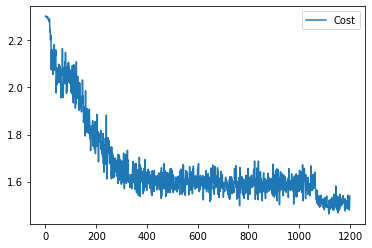

In [ ]:
plt.figure('PyTorch_CNN_Cost')
plt.plot(cost_list,label='Cost')
plt.legend()